# 1A

Felix Douven
Kasper Walraven
Yosha op het Veld

1. Frame the problem and look at the big picture# 1. Frame the problem and look at the big picture

The problem is that we have lots of data of wines. We want to predict the quality of wine. For this we first need to anilize the data and explore multiple algoritms to find the best ones. This will allow us to make predictions.

# 2. Get the data.


In this part we will show how we got the data in our system and what libraries we used in the whole assignment.

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from warnings import simplefilter
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
wine = datasets.load_wine()

With this command we load all the data in to the variable wine. The results are shown below.

In [3]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

So here we can see all the data, targets and the dimensions of the wines


# 
3. Explore the data to gain insights.


In [4]:
def plotMatrix(data):
  fig, ax = plt.subplots()
  # Using matshow here just because it sets the ticks up nicely. imshow is faster.
  ax.matshow(data, cmap='viridis')
  for (i, j), z in np.ndenumerate(data):
     ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
  plt.show()

The first thing we want to look at is what all the data looks like plotted. This will be done in the next step.

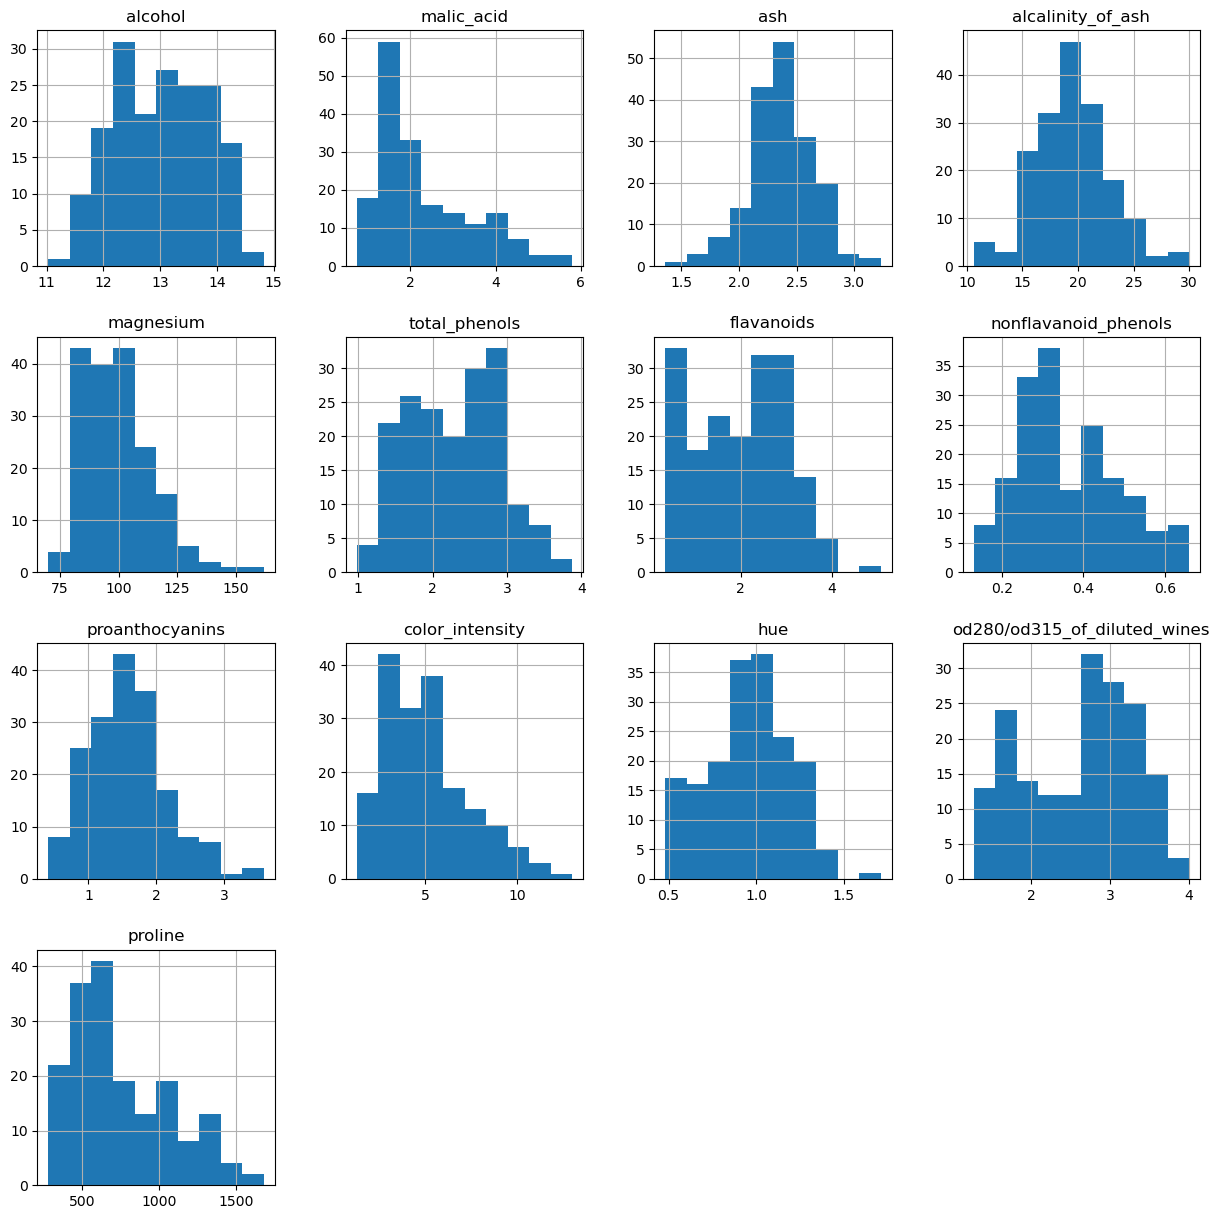

In [5]:
data = load_wine()
data = pd.DataFrame(data.data, columns=data.feature_names)
data.head()
data.replace('?',-99999, inplace=True)
data.hist(figsize=(15,15))
plt.show()

Now that we have some idea on what the data looks like we want to see if the data has some simularities. This is why we want to plot all data against each other.

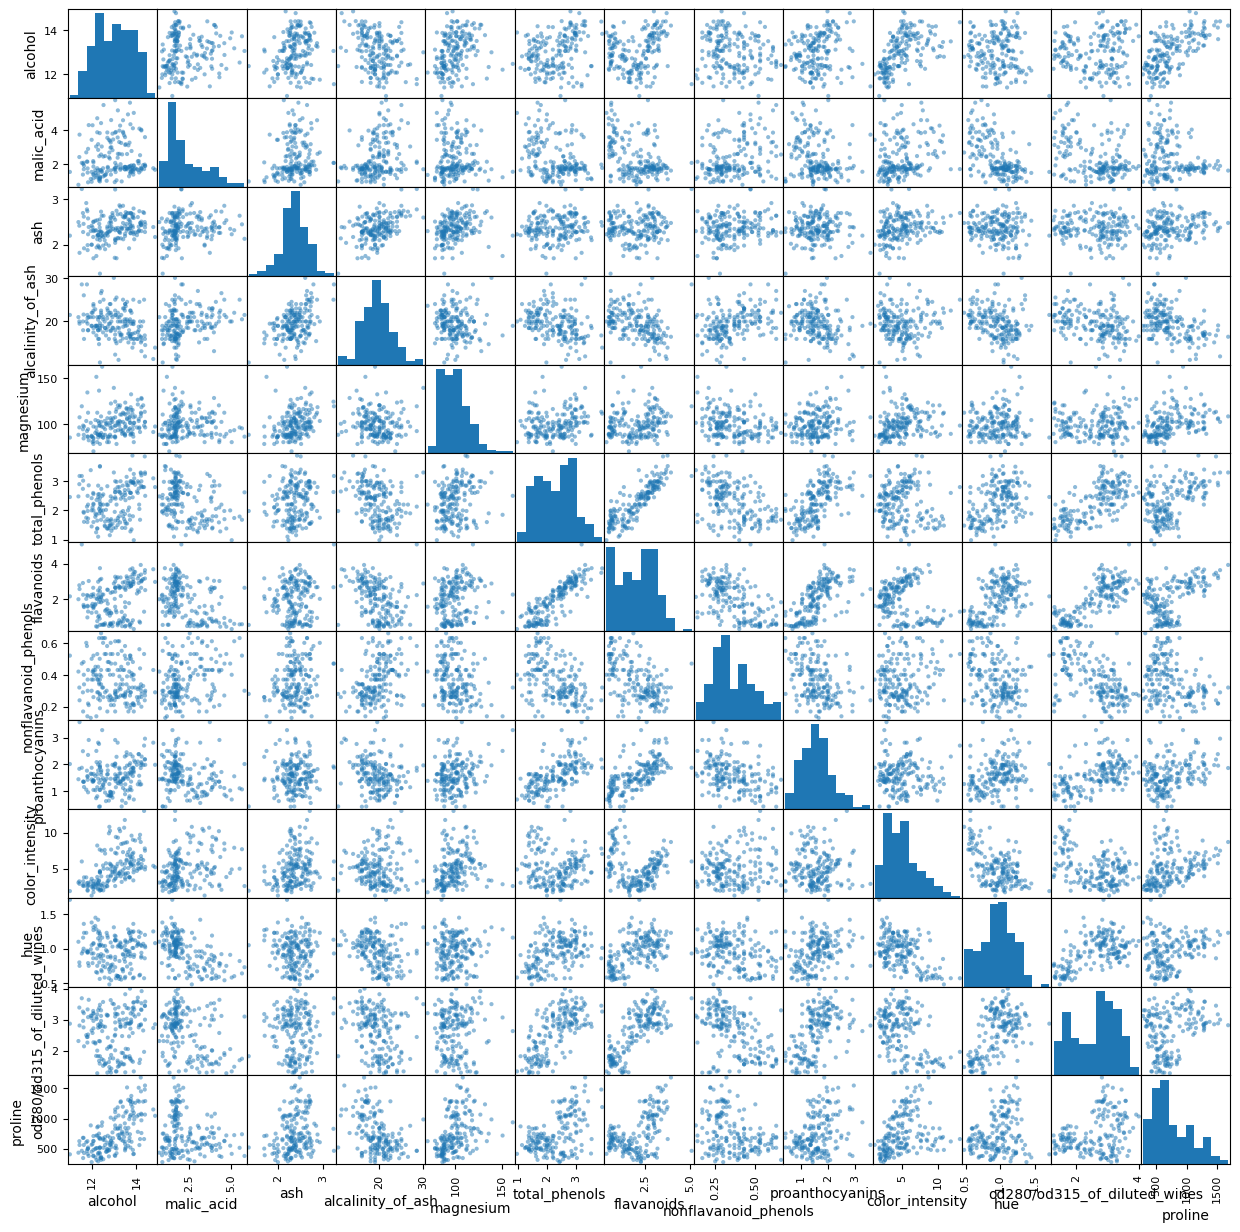

In [6]:
scatter_matrix(data, figsize=(15,15))
plt.show()

In this picture with all the graphs we can look at the data and compare them all. The more the data goes in a diagional line the more they have corisponding data. But because it is still quite hard to see in this picture we can plot the data with numbers instead of graphs.

# 4. repare the data to better expose the underlying data patterns to Machine Learning algorithms

Now we can compare the data and find corrilations

C:\Users\mobie\AppData\Local\Temp\ipykernel_14456\4151643682.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corrmat.style.background_gradient(cmap='viridis').set_precision(4)


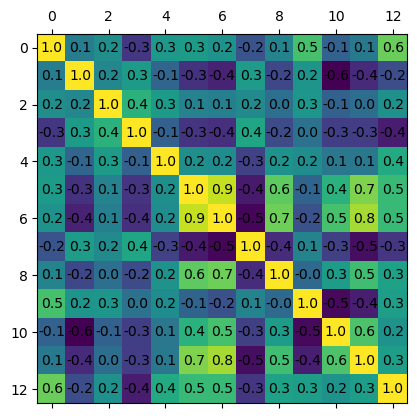

In [7]:
corrmat = data.corr()
corrmat.style.background_gradient(cmap='viridis').set_precision(4)
plotMatrix(corrmat)

In this picture we can see all the data compared to each other. So the nubers van go from -1 to 1. So -1 means an inverse corralation and 1 means high corralation. Because we want to reduce the the amount of dimensions we want to get rid of some of the high corrilated dimensions to reduce the time it takes to train our models. in this case the dimenision that have a high corrilation are. (0 and 13), (5 and 8), (5 and 11), (6 and 8), (6 and 11) and (11 and 10) 
SO if we delete dimensions 0, 5, 6 and 10 we should have less corrilation. this will be done in the following line

In [8]:
Corritalions = [10,6,5,0]
X = wine.data
Y = wine.target
print(X.shape)
for i in Corritalions:
    X = np.delete(X,i,1)
    print(X.shape)


(178, 13)
(178, 12)
(178, 11)
(178, 10)
(178, 9)


THis way we eddidet our data back to only 9 dimensions.

# 5. Explore many different models and short-list the best ones.

Now we are going to look at different models we could use and choose the best options. 


In [9]:
print("There are sampels and dimensions for the features", X.shape)
print("There are sampels and dimensions for the Targets", Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print("there are train sampels and dimensions for the features and the features",X_train.shape, Y_train.shape)
print("there are train sampels and dimensions for the features and the targets",X_test.shape, Y_test.shape)
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    scores.append(score*100)


df = pd.DataFrame(index=names)
df['score'] = scores
print(df)

There are sapels and dimensions for the features (178, 9)
There are sapels and dimensions for the Targets (178,)
there are train sampels and dimensions for the features and the features (142, 9) (142,)
there are train sampels and dimensions for the features and the targets (36, 9) (36,)


E:\programs\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\programs\anaconda\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


                       score
Nearest_Neighbors  72.222222
Linear_SVM         86.111111
Polynomial_SVM     61.111111
RBF_SVM            36.111111
Gaussian_Process   86.111111
Gradient_Boosting  94.444444
Decision_Tree      91.666667
Extra_Trees        97.222222
Random_Forest      94.444444
Neural_Net         27.777778
AdaBoost           80.555556
Naive_Bayes        91.666667
QDA                91.666667
SGD                61.111111


Here we can see the values of all the moddels we tested. Now we can choose three that worked the best. So we are going with Nearest_neighbors, Decision_Tree and Random_Forest

# 6. Fine-tune your models and combine them into a great solution.

Neirest_neighbors

In [10]:
knn = KNeighborsClassifier(3) 
knn.fit(X_train, Y_train)

Y_train_pred = knn.predict(X_train)
Y_test_pred = knn.predict(X_test)

knn_train_accuracy = accuracy_score(Y_train,Y_train_pred) 

knn_test_accuracy = accuracy_score(Y_test, Y_test_pred) 

print('Model performance for Training set')
print('- Accuracy: %s' % knn_train_accuracy)

print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % knn_test_accuracy)


Model performance for Training set
- Accuracy: 0.8661971830985915
----------------------------------
Model performance for Test set
- Accuracy: 0.7222222222222222


E:\programs\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\programs\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

Decision_tree

In [11]:
dt = DecisionTreeClassifier(max_depth=5) 
dt.fit(X_train, Y_train) 

Y_train_pred = dt.predict(X_train)
Y_test_pred = dt.predict(X_test)

dt_train_accuracy = accuracy_score(Y_train, Y_train_pred) 


dt_test_accuracy = accuracy_score(Y_test,Y_test_pred) 


print('Model performance for Training set')
print('- Accuracy: %s' % dt_train_accuracy)

print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % dt_test_accuracy)


Model performance for Training set
- Accuracy: 1.0
----------------------------------
Model performance for Test set
- Accuracy: 0.8888888888888888


# Random forest


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X,Y, stratify=Y, test_size=0.2, random_state=42
)
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, Y_train) 

Y_train_pred = rf.predict(X_train)
Y_test_pred = rf.predict(X_test)

rf_train_accuracy = accuracy_score(Y_train, Y_train_pred) 
 

# Test set performance
rf_test_accuracy = accuracy_score(Y_test,Y_test_pred) 


print('Model performance for Training set')
print('- Accuracy: %s' % rf_train_accuracy)

print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy)


Model performance for Training set
- Accuracy: 0.9859154929577465
----------------------------------
Model performance for Test set
- Accuracy: 1.0


In [13]:
estimator_list = [
    ('knn',knn),
    ('dt',dt),
    ('rf',rf) ]
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)
stack_model.fit(X_train, Y_train)
Y_train_pred = stack_model.predict(X_train)
Y_test_pred = stack_model.predict(X_test)

stack_model_train_accuracy = accuracy_score(Y_train, Y_train_pred) 


stack_model_test_accuracy = accuracy_score(Y_test, Y_test_pred) 


print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)

print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)


Model performance for Training set
- Accuracy: 1.0
----------------------------------
Model performance for Test set
- Accuracy: 0.9166666666666666


Here we can see that the comined model has an accuracy between 88% and 100%(based on 20 runs). 

# 7. Present your solution.


So our solution is a model of three algorithms. Neirest_neighbors, Decision_tree and Random_forest.

# 8. Launch, monitor, and maintain your system.

# 9. Additional Questions

Explain in detail how you think that the top 3 chosen algorithms work?

1. -The neirest neighbors works because wine is very simular to all the other wine and quality is defined by values. So if a certain value is high quality this will be the same for all the other ones. Wich makes neighbors a good algorithm
   
   -Decision tree works well for this kind of data cause it can check the data and make determen the class of the wine with asking questions for each demensions. and if you go down the decision tree you will end up with the correct class
    
    -Random forest is a lot of decision trees wich will make the algoritm work even better

2. Explain why you think that your chosen algorithm outperforms the rest?

Because the wine data is very consistent and for each class there is well defined when it belongs to a class. Tis makes the decision tree and the nearest neighbors very strong.  